# Heart Disease Prediction (Cleveland, Ohio)
### Vu Nguyen Thai Sinh (Kevin)
### Student Number: 63515829

## Introduction

Heart diseases are among the most common causes of death in the world, regardless of sex or ethnicity. Therefore, it is important for medical professionals to accurately identify and diagnose heart diseases given a certain set of symptoms and measurements. This project aims to answer the following question:

**Can we use **age**, **sex** and the **chest pain type** of a random Cleveland civilian to predict their diagnosis of heart disease?**

This dataset contains 303 observations of people from Cleveland, including 13 measurement variables (i.e. age, sex, cholestoral level, resting blood pressure, etc.) and their level of heart disease diagnosis.

## Preliminary Exploratory Data Analysis

### Data Import and Wrangling

The libraries used are tidyverse (for general data wrangling), tidymodels (for splitting data into training and testing groups) and RColorBrewer (for color variety). The data is imported using read_csv (since the data is separated by commas) without column names, which are added accordingly (Janosi et al.). A dictionary which contains the definition of each variable ia also created as a source of reference for the analysis.

In [1]:
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
cle_df <- read_csv('data/heart_disease/processed.cleveland.data', col_names = FALSE)

colnames(cle_df) <- c('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                      'ca', 'thal', 'num')

head(cle_df)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
#Converting values '?' into NA
cle_df[cle_df == '?'] <- NA

In [4]:
#Making a dictionary for definitions and units of every variable
dict <- data.frame(variable = colnames(cle_df), 
           description = c('age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar > 120 mg/dl',
                           'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 
                           'ST depression induced by exercise relative to rest', 'slope of peak exercise ST segment', 
                           'number of major vessels (0 - 3) colored by flourosopy', NA, 'diagnosis of heart disease'),
           unit = c('years', NA, NA, 'mm Hg', 'mg/dl', NA, NA, NA, NA, NA, NA, NA, NA, NA))

dict

variable,description,unit
<chr>,<chr>,<chr>
age,age,years
sex,sex,NA
cp,chest pain type,NA
trestbps,resting blood pressure,mm Hg
chol,serum cholestoral,mg/dl
fbs,fasting blood sugar > 120 mg/dl,NA
restecg,resting electrocardiographic results,NA
thalach,maximum heart rate achieved,NA
exang,exercise induced angina,NA


### Training and Testing Sets

The data is then split into a 75-25 ratio for training and testing. A 75% split is standard for predictive analysis. Consequently, the training set (cle_train) has 225 observations, and the testing set (cle_test) has 78 observations). 

A summary table is then created consisting of the number of observations, total missing values and the average of each predictor (age, sex, cp) in the training set. As stated above, the training set has a total of 225 observations, and since there are no missing values in any of these variables, the number of observations are the same for them. The averages of each variable are as followed:

1. **age** = 54.58
2. **sex** = 0.69: There are more males (sex = 1) than females (sex = 0).
3. **cp** = 3.17: Most chest pain types are either non-aginal (cp = 3) or asymptomatic (cp = 4).

In [5]:
set.seed(2024)

cle_split <- initial_split(cle_df, prop = 0.75, strata = num)
cle_train <- training(cle_split)
cle_test <- testing(cle_split)

In [6]:
glimpse(cle_train)

Rows: 225
Columns: 14
$ age      <dbl> 63, 37, 41, 57, 57, 44, 57, 54, 48, 49, 64, 50, 66, 43, 69, 5…
$ sex      <dbl> 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1…
$ cp       <dbl> 1, 3, 2, 4, 4, 2, 3, 4, 3, 2, 1, 3, 1, 4, 1, 4, 3, 4, 1, 2, 3…
$ trestbps <dbl> 145, 130, 130, 120, 140, 120, 150, 140, 130, 130, 110, 120, 1…
$ chol     <dbl> 233, 250, 204, 354, 192, 263, 168, 239, 275, 266, 211, 219, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…
$ restecg  <dbl> 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0…
$ thalach  <dbl> 150, 187, 172, 163, 148, 173, 174, 160, 139, 171, 144, 158, 1…
$ exang    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.6, 0.4, 0.0, 1.6, 1.2, 0.2, 0.6, 1.8, 1.6, 2…
$ slope    <dbl> 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1…
$ ca       <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0"…
$ thal     <chr> "

In [7]:
glimpse(cle_test)

Rows: 78
Columns: 14
$ age      <dbl> 56, 53, 56, 52, 48, 58, 58, 60, 42, 55, 61, 51, 50, 50, 51, 4…
$ sex      <dbl> 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0…
$ cp       <dbl> 2, 4, 2, 3, 2, 1, 3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4…
$ trestbps <dbl> 120, 140, 140, 172, 110, 150, 120, 117, 140, 132, 150, 110, 1…
$ chol     <dbl> 236, 203, 294, 199, 229, 283, 340, 230, 226, 353, 243, 175, 2…
$ fbs      <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2…
$ thalach  <dbl> 178, 155, 153, 162, 168, 162, 172, 160, 178, 132, 137, 123, 1…
$ exang    <dbl> 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0…
$ oldpeak  <dbl> 0.8, 3.1, 1.3, 0.5, 1.0, 1.0, 0.0, 1.4, 0.0, 1.2, 1.0, 0.6, 2…
$ slope    <dbl> 1, 3, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1…
$ ca       <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal     <chr> "3

In [8]:
#Total number of observations of predictors
nrows <- cle_train |> select(age, sex, cp) |> 
map_df(length)

In [9]:
#Calculating the averages of predictors
means <- cle_train |> select(age, sex, cp) |> 
map_df(mean) |> round(2)

In [10]:
#Checking for missing values for predictors in training set
missing <- cle_train |> select(age, sex, cp) |>
map_df(function(c) sum(is.na(c)))

In [11]:
#Summary table
summary <- bind_rows(nrows, means, missing)
summary <- cbind(value = c('Observations', 'Average', 'Missing Values'), summary)

summary

value,age,sex,cp
<chr>,<dbl>,<dbl>,<dbl>
Observations,225.00,225.00,225.00
Average,54.58,0.69,3.17
Missing Values,0.00,0.00,0.00


### Exploratory Data Visualization

The variables in the training set which have the wrong class types are converted to be consistent with the actual data (Janosi et al.). cle_df_mod is a modified dataframe from the training set where all factor variables are assigned the values that are associated with the numbers. This is used to create visualisation graphs to illustrate the relationship between the predictors: **age**, **sex** and **cp** (chest pain type) and the classifying value **num** (heart disease diagnosis). Three graphs are created:

1. **Percentage of Heart Disease Diagnosis for Each Sex**: Male individuals in this training sample has a higher chance of being diagnosed with heart diseases compared to their female counterparts.
2. **Age Distribution and Heart Disease Diagnosis, sorted by Sex**: It can be seen that the majority of the cases with heart disease, especially dangerous ones (num > 2), lies between the ages of 50 and 70 for both sexes.
3. **Percentage of Chest Pain Types on Heart Disease Diagnosis**: Despite the lack of trend in the other types, asymptomatic chest pain (no significant symptoms) can be seen to increase significantly with the levels of heart disease diagnosis. This can be important as it is a sign that chest pain is not a good indicator of a heart disease.

In [12]:
#Converting data types
cle_df_mod <- cle_train |>
mutate(sex = as_factor(sex), cp = as_factor(cp), fbs = as_factor(fbs), restecg = as_factor(restecg),
       exang = as_factor(exang), slope = as_factor(slope), thal = as_factor(as.numeric(thal)),
      ca = as.numeric(ca))

In [13]:
#Creating a df with character values for visualisation
cle_df_mod <- cle_df_mod |>
mutate(sex = fct_recode(sex, 'Male' = "1", 'Female' = "0"), 
       cp = fct_recode(cp, 'Typical Angina' = "1", 'Atypical Angina' = "2", 'Non-Anginal Pain' = "3", 'Asymptomatic' = "4"),
      fbs = fct_recode(fbs, 'True' = "1", 'False' = "0"),
      restecg = fct_recode(restecg, 'ST-T Wave Abnormality' = "1", 'Normal' = "0", 'Left Ventricular Hypertrophy' = "2"),
      exang = fct_recode(exang, 'Yes' = "1", 'No' = "0"),
      slope = fct_recode(slope, 'Upsloping' = "1", 'Flat' = "2", 'Downsloping' = "3"),
      thal = fct_recode(thal, 'Normal' = "3", 'Fixed Defect' = "6", 'Reversable Effect' = "7"))

head(cle_df_mod)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
63,Male,Typical Angina,145,233,True,Left Ventricular Hypertrophy,150,No,2.3,Downsloping,0,Fixed Defect,0
37,Male,Non-Anginal Pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
41,Female,Atypical Angina,130,204,False,Left Ventricular Hypertrophy,172,No,1.4,Upsloping,0,Normal,0
57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,Upsloping,0,Normal,0
57,Male,Asymptomatic,140,192,False,Normal,148,No,0.4,Flat,0,Fixed Defect,0
44,Male,Atypical Angina,120,263,False,Normal,173,No,0.0,Upsloping,0,Reversable Effect,0


In [14]:
#Rearrange order of sex
cle_df_mod$sex <- factor(cle_df_mod$sex, levels = c('Male', 'Female'))

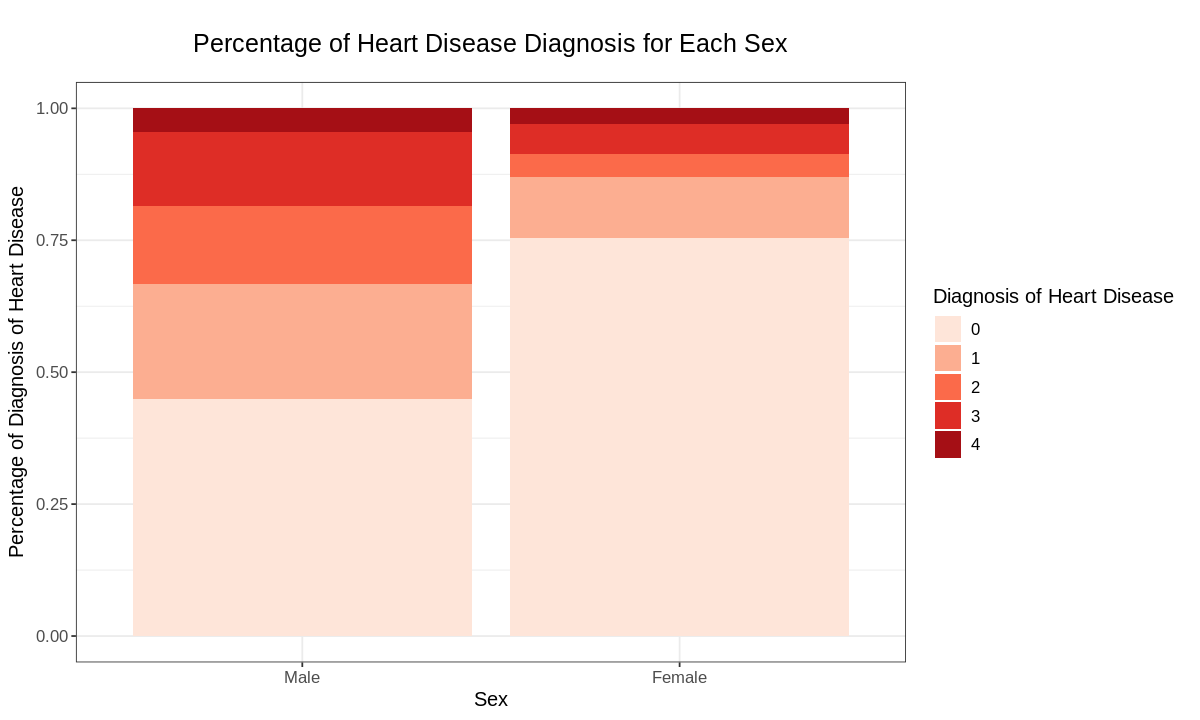

In [15]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(cle_df_mod, aes(x = sex, fill = factor(num))) + 
geom_bar(position = position_fill(reverse = TRUE)) +
labs(x = 'Sex', y = 'Percentage of Diagnosis of Heart Disease', 
     fill = 'Diagnosis of Heart Disease') +
ggtitle('Percentage of Heart Disease Diagnosis for Each Sex') +
theme_bw() +
scale_fill_brewer(palette = 'Reds') +
theme(axis.text = element_text(size = 10),
     legend.text = element_text(size = 10),
     legend.title = element_text(size = 12),
      axis.title = element_text(size = 12),
     plot.title = element_text(size = 15, hjust = 0.5,
                              margin = margin(b = 15, t = 15)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_bar()`).”


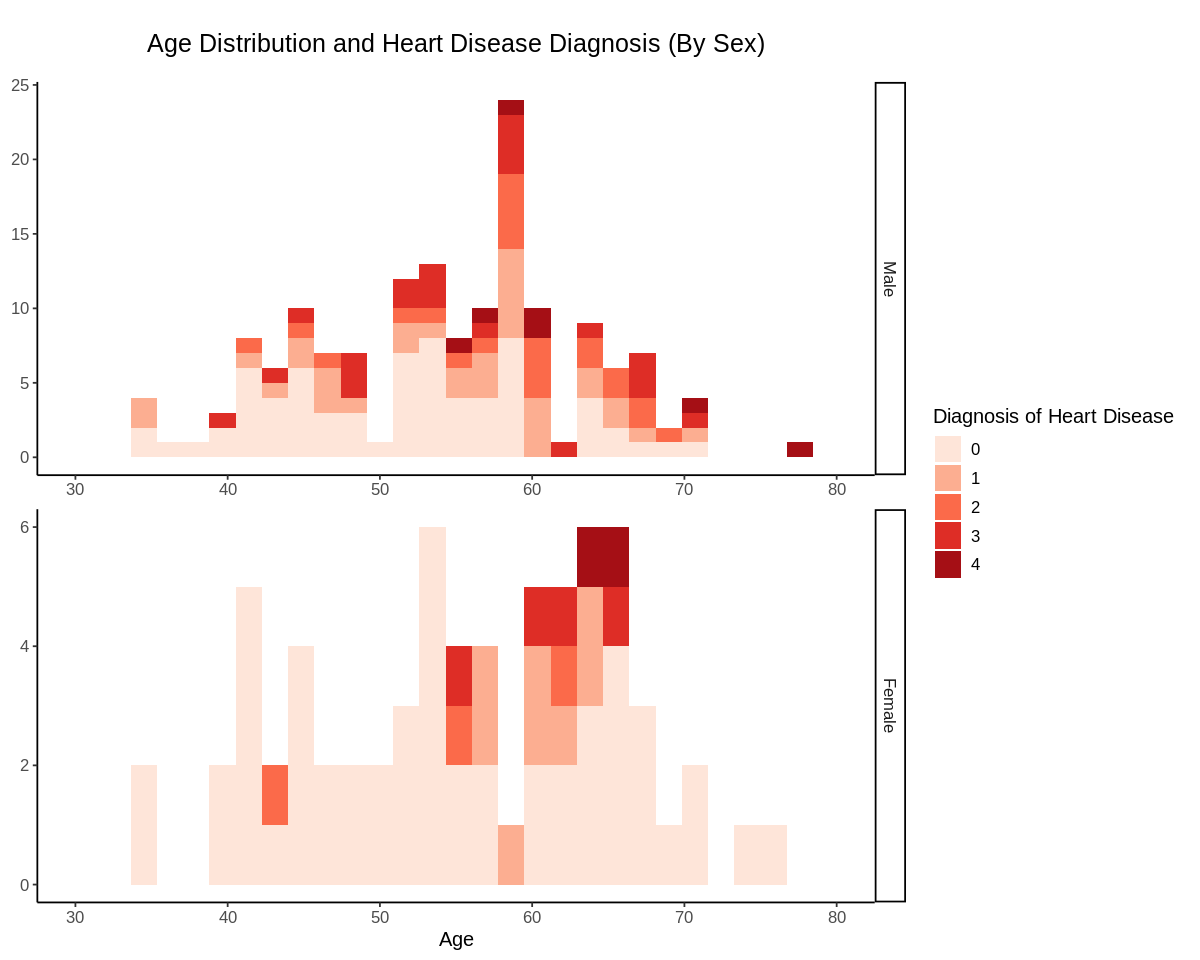

In [16]:
options(repr.plot.width = 10, repr.plot.height = 8)

cle_df_mod %>%
ggplot(aes(x = age, fill = factor(num))) +
geom_histogram(position = position_stack(reverse = TRUE)) +
scale_x_continuous(limits = c(30, 80)) +
scale_fill_brewer(palette = 'Reds') +
facet_grid(rows = vars(sex), axes = 'all', scales = 'free') +
labs(x = "Age", fill = "Diagnosis of Heart Disease") +
ggtitle('Age Distribution and Heart Disease Diagnosis (By Sex)') +
theme_classic() +
theme(axis.text = element_text(size = 10),
      strip.text = element_text(size = 10),
     legend.text = element_text(size = 10),
     legend.title = element_text(size = 12),
      axis.title = element_text(size = 12),
      axis.title.y = element_blank(),
     plot.title = element_text(size = 15, hjust = 0.5,
                              margin = margin(b = 15, t = 15)))

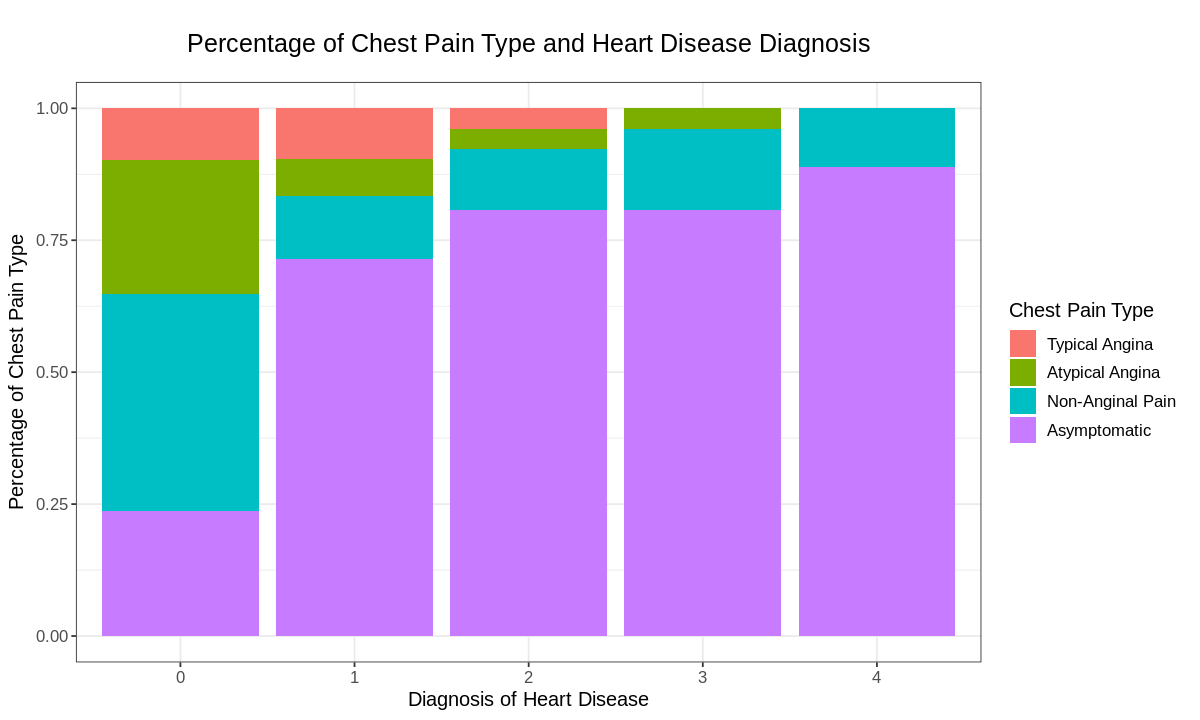

In [17]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(cle_df_mod, aes(x = factor(num), fill = cp)) + 
geom_bar(position = 'fill') +
labs(x = 'Diagnosis of Heart Disease', y = 'Percentage of Chest Pain Type', 
     fill = 'Chest Pain Type') +
ggtitle('Percentage of Chest Pain Type and Heart Disease Diagnosis') +
theme_bw() +
theme(axis.text = element_text(size = 10),
     legend.text = element_text(size = 10),
     legend.title = element_text(size = 12),
      axis.title = element_text(size = 12),
     plot.title = element_text(size = 15, hjust = 0.5,
                              margin = margin(b = 15, t = 15)))

## Data Analysis

### Method

The **KNN classification** method will be conducted to predict the **num** variable using predictors: **age**, **sex** and **cp**. Because these values are in different ranges, they need to be standardized to complete an unbiased and accurate analysis. The parameter K (number of neighbors) will also need to be tuned to find the optimal value for this problem, using cross-validation.

Recall is the most important aspect of this classification problem, because a wrongful prediction can be deadly for the patients. Because of that, a line graph on K values and their accuracy from cross validation will be illustrated, and a confusion table which shows recall at every value of num will also be made.

### Tuning Classifier

For the KNN classsification model to work, the training and testing sets need to have the predicted varaible as a factor, for classfication purposes. Then, the parameter K with the highest accuracy rate must be selected. This requires parameter tuning, as can be carried out with the following steps:

The first step is to choose a range of parameters K to test. I choose numbers from 1 to 81 with gaps of 5 because I want there to be enough options without making the model too heavy to run (I also stop at 81 because from then onwards, the accuracy does not change). Then, I create a 10-fold cross validation grid using the training set to make sure that the accuracies calculated for each value of K are close to the true accuracy. After, a tuning model and scaled recipe are created with functions of the 'tidymodel' library. Finally, a workflow for tuning is carried out and the accuracies are collected, graphed out and the best K value is recorded.

**Results**: Unfortunately, I encountered some problems. First, the tuning workflow was unable to detect observations of level 4 (i.e. num = 4), for unknown reasons. As a result, with this model, no predictions have the value 4, which is extremely dangerous as this is the worst diagnosis of heart disease (Janosi et al.), and missing them as predicted values can definitely be fatal to patients. Moreover, from cross validation, the highest accuracy recorded at K = 31 is only 55.3%, which means that only approximately half of these predictions are reliable.

Nonetheless, as can be seen in below, the parameter K that gives us the best accuracy is K = 31, which will be used to set up my predictive KNN model.

In [18]:
#Convert the predicted variable (num) to a factor
cle_train <- cle_train |>
mutate(num = as_factor(num))

cle_test <- cle_test |>
mutate(num = as_factor(num))

In [19]:
#Range of chosen K values
k_vals <- tibble(neighbors = seq(from = 1, to = 81, by = 5))

#10-Fold Cross Validation
cle_vfold <- vfold_cv(cle_train, v = 10, strata = num)

In [20]:
#KNN model for tuning
knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
set_engine('kknn') |> 
set_mode('classification')

#Recipe for this data
cle_recipe <- recipe(num ~ age + sex + cp, data = cle_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

In [21]:
#Collecting Accuracy
k_accuracies <- workflow() |>
add_recipe(cle_recipe) |>
add_model(knn_spec) |>
tune_grid(resamples = cle_vfold, grid = k_vals) |>
collect_metrics() |>
filter(.metric == 'accuracy')

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x3

There were issues with some computations   A: x3





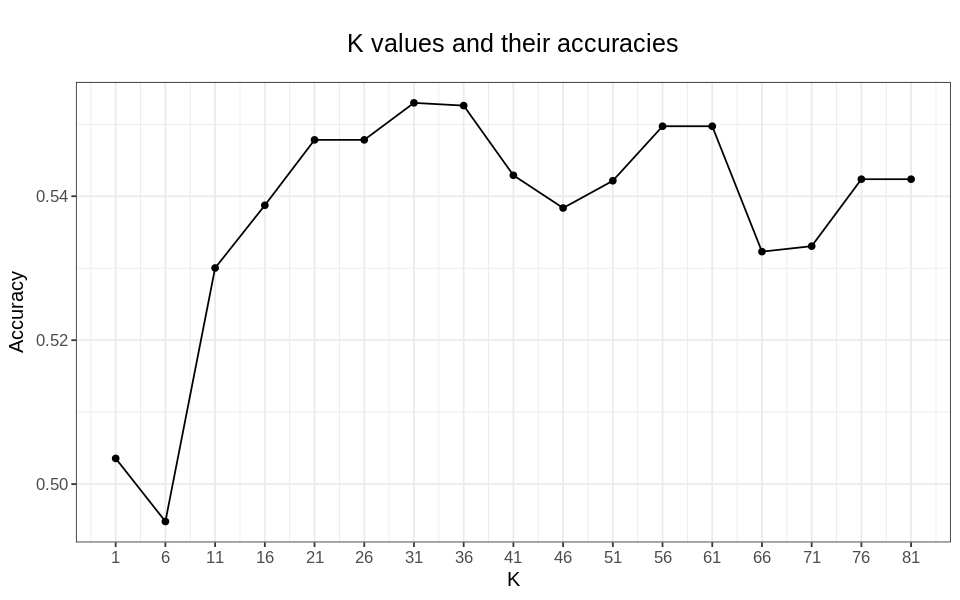

In [22]:
options(repr.plot.width = 8, repr.plot.height = 5)

k_accuracies |> ggplot(aes(neighbors, mean)) +
geom_line() +
geom_point() +
scale_x_continuous(breaks = seq(1, 81, by = 5)) +
labs(x = 'K', y = 'Accuracy') +
ggtitle('K values and their accuracies') +
theme_bw() +
theme(axis.text = element_text(size = 10),
     legend.text = element_text(size = 10),
     legend.title = element_text(size = 12),
      axis.title = element_text(size = 12),
     plot.title = element_text(size = 15, hjust = 0.5,
                              margin = margin(b = 15, t = 15)))

In [23]:
#Accuracy of best K
best_k_accuracy <- k_accuracies |> mutate(accuracy = mean) |>
select(neighbors, accuracy) |>
slice_max(accuracy)

best_k_accuracy

neighbors,accuracy
<dbl>,<dbl>
31,0.5529762


In [24]:
#Best K
best_k <- best_k_accuracy |>
pull(neighbors)

best_k

[1] 31

### Classification

With K = 31 as my KNN parameter, I set up another nearest neighbor model with this variable. Consequently, in a 3D space with age, sex and cp as the axes, a random point will be classified as the group (num) which defines the majority of the 31 points closest to it. Another workflow is then carried out to create a fit with this model and the recipe above. Using predictors from the testing set, class predictions are made and compared to the actual classification of those points. Finally, I record the accuracy of the model, display a confusion matrix and calculate the recall values of all num classes above 0 (positive diagnoses of heart diseases).

**Results**: As can be seen below, the accuracy of my model is 56.4%, which is higher than the accuracy from cross-validation, but still not reliable in predicting heart disease diagnoses. From the confusion matrix, the recall values of num values 1, 2, 3, 4 are 0.15, 0.4, 0 and 0, respectively.

In [25]:
#KNN model with best K
knn_spec_best <- nearest_neighbor(weight_func = 'rectangular', neighbors = best_k) |>
set_engine('kknn') |> 
set_mode('classification')

#Fit with best K
cle_fit <- workflow() |>
add_recipe(cle_recipe) |>
add_model(knn_spec_best) |>
fit(data = cle_train)

In [26]:
#Predict
cle_prediction <- predict(cle_fit, cle_test) |>
bind_cols(cle_test) |>
select(age, sex, cp, num, .pred_class)

head(cle_prediction)

age,sex,cp,num,.pred_class
<dbl>,<dbl>,<dbl>,<fct>,<fct>
56,1,2,0,0
53,1,4,1,1
56,0,2,0,0
52,1,3,0,0
48,1,2,1,0
58,0,1,0,0


In [27]:
cle_prediction |>
metrics(truth = num, estimate = .pred_class) |>
filter(.metric == 'accuracy')

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5641026


In [28]:
cle_prediction |> 
conf_mat(truth = num, estimate = .pred_class)

          Truth
Prediction  0  1  2  3  4
         0 38 10  5  4  1
         1  2  2  1  4  2
         2  1  1  4  1  1
         3  1  0  0  0  0
         4  0  0  0  0  0

In [29]:
#Recall for all values of num (except num = 0)
rec_1 <- 2/(10+2+1)
rec_2 <- 4/(5+1+4)
rec_3 <- 0
rec_4 <- 0

paste('Recall for num = 1:', round(rec_1, 2))
paste('Recall for num = 2:', round(rec_2, 2))
paste('Recall for num = 3:', round(rec_3, 2))
paste('Recall for num = 4:', round(rec_4, 2))

[1] "Recall for num = 1: 0.15"

[1] "Recall for num = 2: 0.4"

[1] "Recall for num = 3: 0"

[1] "Recall for num = 4: 0"

## Final Discussion

### Expected Outcome and Significance

According to the correlation that can be seen in the graphs under Exploratory Data Analysis, I expect the heart diseases diagnosis (num) to increase with **male** individuals showing **asymptomatic chest pain**, **ages from 50 to 70**. If these hypotheses are correct, medical professionals in Cleveland can better understand the demographics of people who suffer from heart diseases in their city. Also, if asymptomatic chest pain predicts heart diseases, this means that chest pain might not be a good indicator of the disease, and so there should be other symptoms or measures that might be more effective for the prediction.

### Findings and Discussion

As stated above, the accuracy of the final KNN model with parameter K = 31 is only 56.4%, which means that barely more than half of the predictions are reliable. Furthermore, for positive classes of heart disease diagnoses (num > 0), the recall (number of positive predictions/ number of positive observations) are all under 50%. More specifically, the worst diagnoses of num = 3 and num = 4 are 0%, which means that this model will most likely never diagnose these level correctly. These wrong predictions if applied to real patients will be deadly because medical professionals will not be able to provide the right care given the inaccurate diagnoses.

This is a surprising discovery for me, as it was clear to me that there are correlations between these predictors and the diagnosis categorization under the Exploratory Data Analysis section. However, with further research, I discover that machine learning and data mining models that are a lot more complex than this also return findings that are just as unreliable. Specifically, Alzahani et al. (2014) use multiple data mining techniques such as decision trees, Naive Bayes classifiers, KNN, support vector machine (SVM) and artifical neural network to build a model to predict levels of heart disease diagnosis with the same dataset. Resultingly, the accuracy is only around 60% to 75%, which despite being significantly higher than my model, is not enough to be trusted with real patients. Nevertheless, the problem is not unsolvable. A more recent paper from Srinivasan et al. (2023) demonstrates that a state-of-the-art neural network model is able to achieve an accuracy rate from 90.78% up to 98.7% for heart disease diagnoses, with a recall of 95.31%. These numbers render the models worth considering to apply to the real-world problem.

The two articles above show that it can be quite unclear what the reasons for the low accuracy and recall rate of my model are. Maybe my chosen predictors are not good indicators of the diagnosis, or maybe KNN classification is not the best (or not sufficient) predicting model for this problem, or maybe the model which I set up is erroneous. Regardless of the reason, it can be concluded that this simple KNN model with three predictors should not be used to predict heart disease diagnoses in the medical industry of Cleveland, as it will be deadly and costly to inaccurately predict a patient's heart condition. This conclusion leads to the following questions:

1. What other models (or combination of models) of classification or machine learning can we use to improve the accuracy and recall (and/or other metrics) of the prediction of heart disease?
2. What other variables or measurements can we collect from a patient that can have a correlational (or even causal) relationship with the patient's heart disease diagnosis?
3. Can a model with high accuracy and recall (and/or other metrics) for the population of Cleveland, Ohio be applicable to patients in other geographical locations in the world?

## Citation

Alzahani, Salha M., et al. "An overview of data mining techniques applied for heart disease diagnosis and prediction." Lecture Notes on Information Theory 2.4 (2014).

Janosi, Andras, et al. “Heart Disease.” UCI Machine Learning Repository, archive.ics.uci.edu/dataset/45/heart+disease. Accessed 9 June 2024.

Srinivasan, Saravanan, et al. “An active learning machine technique based prediction of cardiovascular heart disease from UCI-Repository Database.” Scientific Reports, vol. 13, no. 1, 21 Aug. 2023, https://doi.org/10.1038/s41598-023-40717-1. 